In [161]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)
print(k2_max)
print(k2_min)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [87]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA         Ech  Tortuosity          k_m2
count   47.000000  47.000000  47.000000   47.000000   47.000000  4.700000e+01
mean   270.504617   0.121851   6.172596 -106.591532    3.170772  8.913665e-12
std    159.433831   0.067019   2.449245   74.449813    0.878953  2.483465e-11
min     10.573000   0.020000   0.791000 -362.849000    1.340000  2.456179e-14
25%    116.198000   0.078000   4.747000 -156.334000    2.776500  3.106119e-13
50%    307.044000   0.115000   5.808000 -110.411000    3.313300  5.462786e-13
75%    359.139000   0.137500   7.687000  -44.292500    3.834000  1.447758e-12
max    607.796000   0.297000  10.300000   -2.017000    4.459000  1.319490e-10


In [82]:
# Controlla i valori mancanti
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Missing Values:
 Conn.Dens.    0
Porosity      0
SSA           0
Ech           0
Tortuosity    0
k_m2          0
dtype: int64

Correlation Matrix:
             Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
Conn.Dens.    1.000000  0.864499  0.664176 -0.639080   -0.617447  0.587967
Porosity      0.864499  1.000000  0.632855 -0.523979   -0.697743  0.767341
SSA           0.664176  0.632855  1.000000 -0.754408   -0.229806  0.259044
Ech          -0.639080 -0.523979 -0.754408  1.000000    0.300040 -0.455071
Tortuosity   -0.617447 -0.697743 -0.229806  0.300040    1.000000 -0.634436
k_m2          0.587967  0.767341  0.259044 -0.455071   -0.634436  1.000000


<Figure size 1200x1200 with 0 Axes>

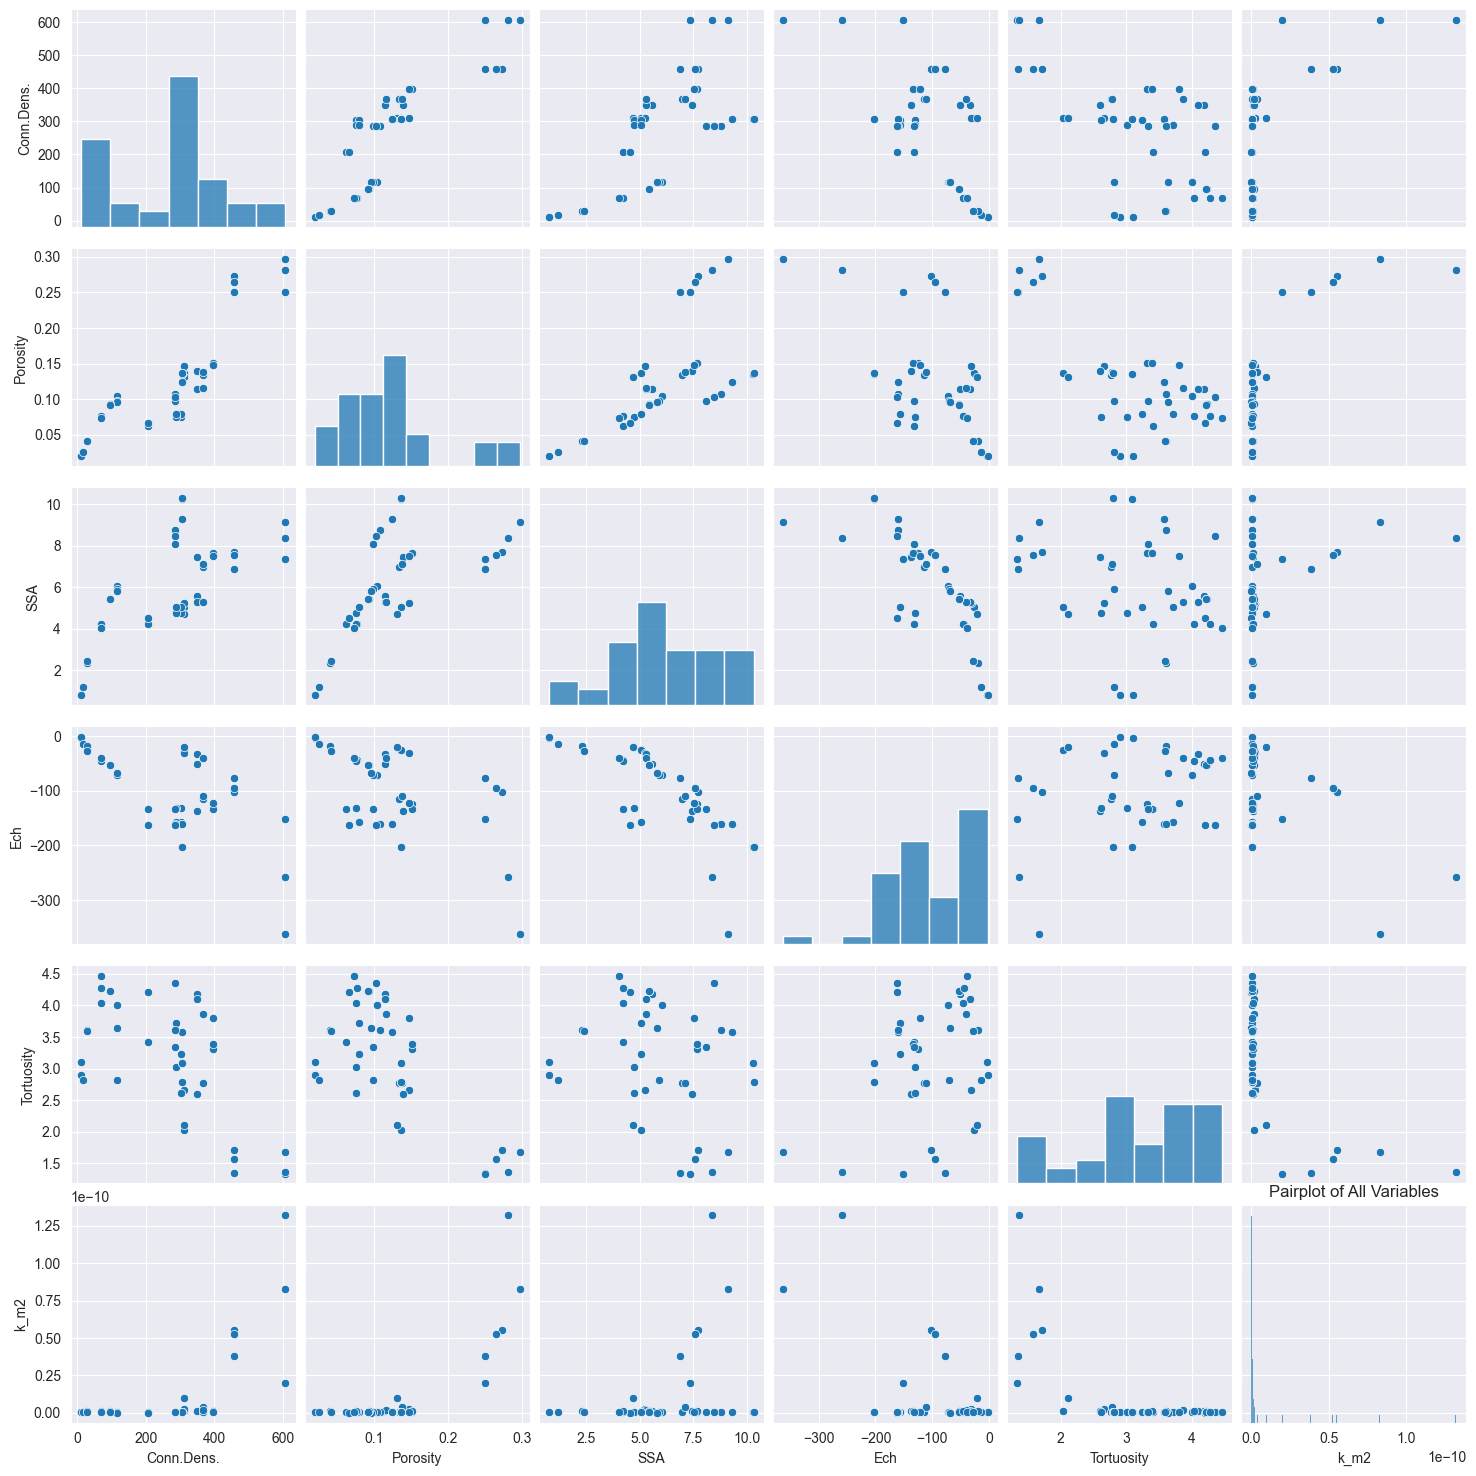

In [88]:
# Pairplot delle variabili
plt.figure(figsize=(12, 12))
sns.pairplot(df)
plt.title('Pairplot of All Variables')
plt.savefig('pairplot_all_variables.png')  # Save the pairplot as an image file
plt.savefig('pairplot_all_variables.pdf', dpi=300)  # Save the pairplot as a PDF file
plt.show()

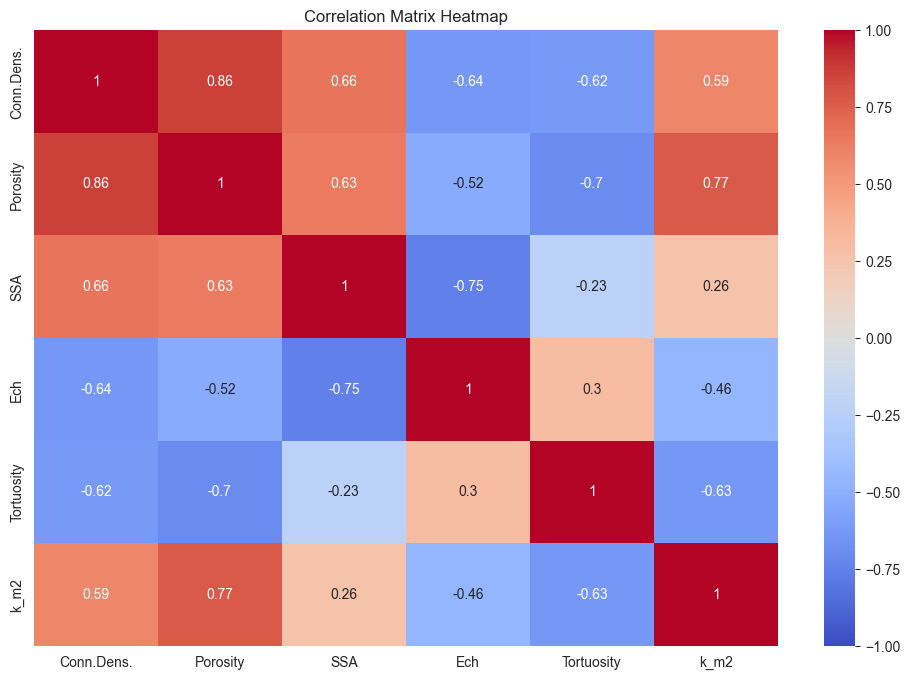

In [89]:
# Heatmap della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [162]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)


DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.010982
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.016905
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.072152
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.007140
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.006773
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.010697
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.002854
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.029657
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.014473
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.002104
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.002232
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.417936
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.289555
13    0.749909  0.884477  0.711852  0.74217

In [163]:
#Dichiarazione dataset train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

Questa fase viene eseguita la PCA analysis

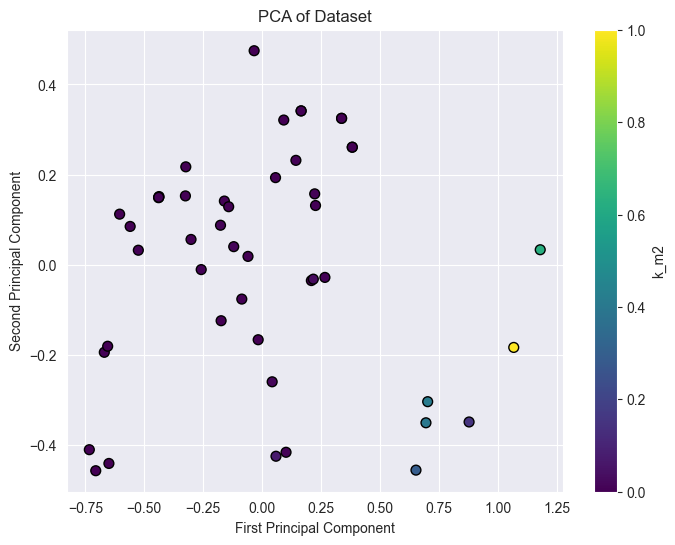

In [92]:
from sklearn.decomposition import PCA

# Inizializzare la PCA e specificare il numero di componenti principali
pca = PCA(n_components=2)


# Adattare la PCA ai dati e trasformarli
X_pca = pca.fit_transform(X)

# Creare un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar(label='k_m2')
plt.grid(True)
plt.show()


In [93]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")


Explained variance by each component: [0.68120147 0.20162208]
Total explained variance: 0.8828235548898359


Primo training grezzo per la ricerca del miglior random state

Random state: 0 - R^2 score: 0.9889275303774814 
Random state: 1 - R^2 score: 0.05185431460946188 
Random state: 2 - R^2 score: -1.0141674034058799 
Random state: 3 - R^2 score: 0.6263888894060665 
Random state: 4 - R^2 score: 0.3972555462724998 
Random state: 5 - R^2 score: 0.013561939417894742 
Random state: 6 - R^2 score: -20.550800592026473 
Random state: 7 - R^2 score: 0.6113617394880541 
Random state: 8 - R^2 score: 0.5997115173014347 
Random state: 9 - R^2 score: 0.7006057115718071 
Random state: 10 - R^2 score: 0.04650526640856367 
Random state: 11 - R^2 score: -18.504304163461207 
Random state: 12 - R^2 score: -0.3331509863239721 
Random state: 13 - R^2 score: -76.14144711401588 
Random state: 14 - R^2 score: 0.11014385733727938 
Random state: 15 - R^2 score: -20.214932938832444 
Random state: 16 - R^2 score: -1.1437894346808304 
Random state: 17 - R^2 score: 0.6108693396459625 
Random state: 18 - R^2 score: 0.6267330710849466 
Random state: 19 - R^2 score: 0.6242028409038824 

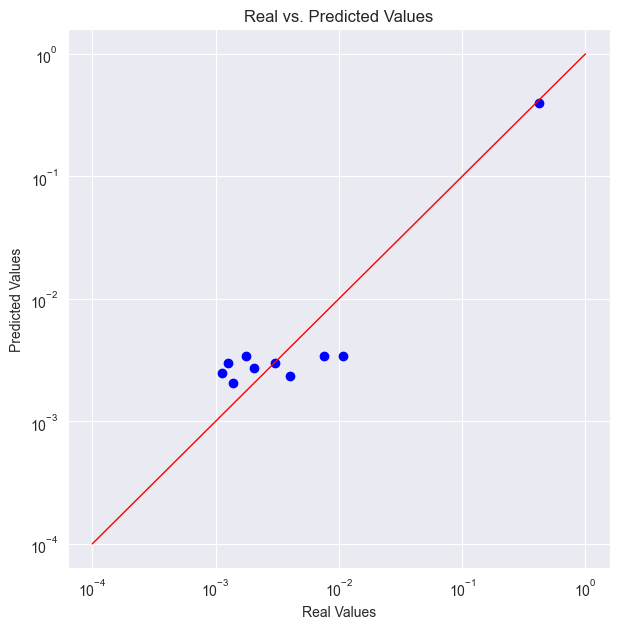

In [164]:

import os

best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

scores = []
random_states = []
    
for random_state in range(0, 100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
        
    scores.append(score)
    random_states.append(random_state)

    print(f"Random state: {random_state} - R^2 score: {score} ")
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_test = y_test
        best_y_pred = y_pred

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")

relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}preliminaryTraining.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}preliminaryTraining.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

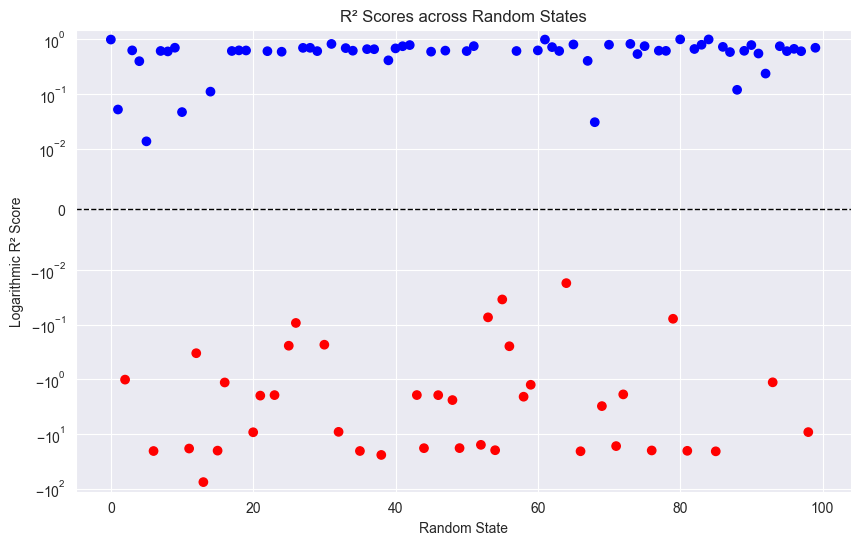

In [95]:
# Scatter plot con scala simmetrica logaritmica
plt.figure(figsize=(10, 6))
plt.scatter(random_states, scores, color=['red' if s < 0 else 'blue' for s in scores])  # Rosso per R² negativi, blu per positivi
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Linea di riferimento a R² = 0
plt.xlabel('Random State')

plt.ylabel('Logarithmic R² Score')
plt.ylim(min(scores) * 1.5, max(scores) * 1.5)  # Espandi i limiti dell'asse Y

plt.yscale('symlog', base=10, linthresh=0.01)  # Imposta la scala logaritmica simmetrica, con scala lineare per valori vicino a zero
plt.title('R² Scores across Random States')
plt.grid(True)
plt.show()

In [165]:
print(best_y_test)
print(best_y_pred)

20    0.001381
41    0.001757
34    0.001132
42    0.007556
26    0.002038
44    0.001272
21    0.004007
27    0.003040
39    0.010879
11    0.417936
Name: k_m2, dtype: float64
[0.00203735 0.00342266 0.00250029 0.0033838  0.00274262 0.00298612
 0.00235377 0.00296821 0.00342266 0.39975727]


Hyperparameter tuning

Fitting 10 folds for each of 1944 candidates, totalling 19440 fits
Best parameters found: {'alpha': 0.1, 'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
R^2 score: 0.9991354818102584
MSE: 1.3360550795974227e-05
MAE: 0.0029842116805791083


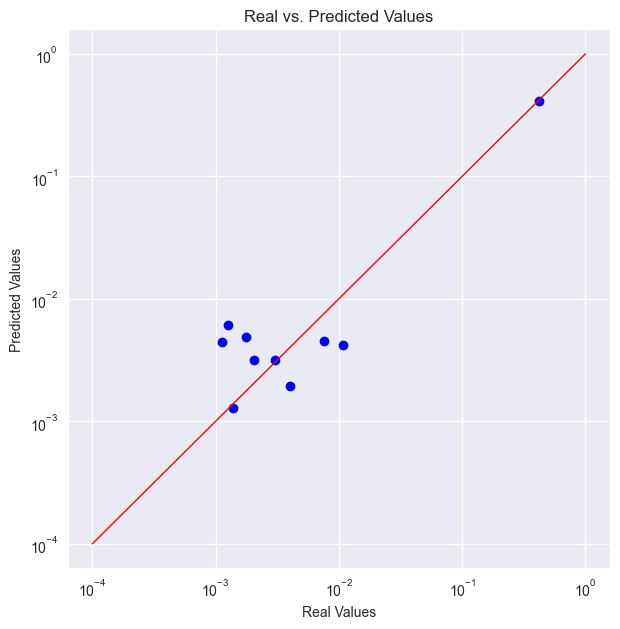

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from tqdm import tqdm
import joblib

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'alpha': [0, 0.1]
}

X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)

model = XGBRegressor(random_state=best_random_state_split)


# Integra tqdm con joblib per mostrare la progress bar
tqdm_callback = lambda iterable: tqdm(
    iterable, 
    total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample']) * len(param_grid['colsample_bytree']), 
    desc="Hyperparameter tuning"
)
loo = LeaveOneOut()
# Usa joblib per patchare il parallel computing di scikit-learn
with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}hyperParam_tuning.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}hyperParam_tuning.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [167]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': y_test,
    'Valori Predetti': y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.001278
41      0.001757         0.004842
34      0.001132         0.004429
42      0.007556         0.004502
26      0.002038         0.003146
44      0.001272         0.006078
21      0.004007         0.001934
27      0.003040         0.003146
39      0.010879         0.004186
11      0.417936         0.412416


Best random_state for train_test_split: 0 with R^2 score: 0.9991354818102584


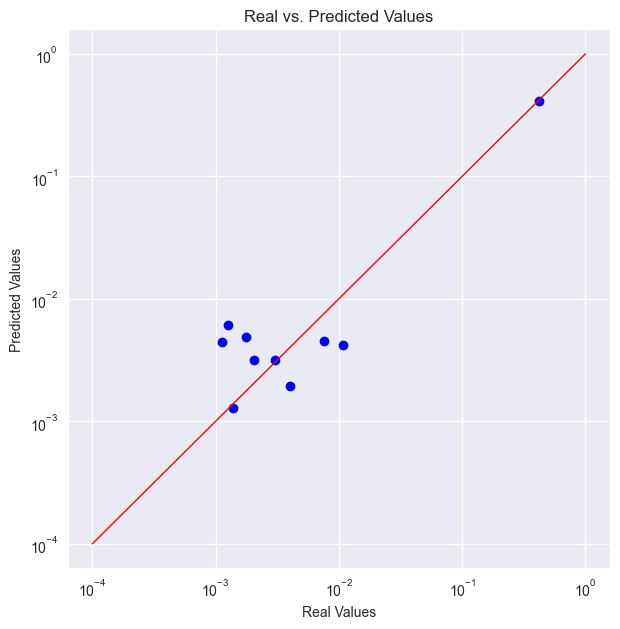

In [170]:
#Con gli iperparametri migliori trovati, riaddestro il modello sul miglior random state per train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):
    
    # model = XGBRegressor(
    #     alpha= 0.1,
    #     colsample_bytree= 0.9,
    #     gamma= 0,
    #     learning_rate= 0.3,
    #     max_depth= 7,
    #     min_child_weight = 1,
    #     n_estimators= 200,
    #     subsample= 0.7
    # )
        
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test


relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)


print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.title('Real vs. Predicted Values')
plt.grid(True)


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}final_train.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}final_train.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [171]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': best_y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.001278
41      0.001757         0.004842
34      0.001132         0.004429
42      0.007556         0.004502
26      0.002038         0.003146
44      0.001272         0.006078
21      0.004007         0.001934
27      0.003040         0.003146
39      0.010879         0.004186
11      0.417936         0.412416


VALIDAZIONE

In [172]:
# il modello adesso prevede k_m2 per ogni record
y_pred_tot = best_model.predict(X)

# Aggiungo la colonna delle predizioni al dataset
X['k_m2_predetto'] = y_pred_tot

# Visualizza il dataset con la nuova colonna
print(X)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity  k_m2_predetto
0     0.502894  0.422383  0.449469  0.933953    0.222507       0.044091
1     0.502894  0.458484  0.469240  0.919672    0.424816       0.012675
2     0.502894  0.400722  0.410769  0.950032    0.246553       0.053337
3     0.568572  0.342960  0.503944  0.865322    0.911510       0.006782
4     0.568572  0.429603  0.699968  0.626641    0.402373       0.010574
5     0.568572  0.342960  0.475339  0.914392    0.885220       0.008031
6     0.598718  0.411552  0.651909  0.686278    0.459763       0.009673
7     0.598718  0.425993  0.666842  0.699600    0.461366       0.016642
8     0.598718  0.346570  0.473131  0.895433    0.810516       0.008320
9     0.000000  0.000000  0.000000  0.994648    0.564283       0.006078
10    0.000000  0.000000  0.001577  1.000000    0.500160       0.006078
11    0.749909  0.913357  0.728783  0.721735    0.120872       0.412416
12    0.749909  0.830325  0.639289  0.793641    0.004168       0

In [176]:
#Denormalizzo tutto
df_denormalizzato = scaler.inverse_transform(X)

# Converti di nuovo in DataFrame
df_denormalizzato = pd.DataFrame(df_denormalizzato, columns=X.columns)

# Visualizza il dataset denormalizzato
print(df_denormalizzato)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity  k_m2_predetto
0      310.913     0.137   5.065  -25.849      2.0340   5.841247e-12
1      310.913     0.147   5.253  -31.002      2.6650   1.696730e-12
2      310.913     0.131   4.697  -20.047      2.1090   7.060956e-12
3      350.137     0.115   5.583  -50.613      4.1830   9.193118e-13
4      350.137     0.139   7.447 -136.737      2.5950   1.419508e-12
5      350.137     0.115   5.311  -32.907      4.1010   1.084030e-12
6      368.141     0.134   6.990 -115.218      2.7740   1.300631e-12
7      368.141     0.138   7.132 -110.411      2.7790   2.220013e-12
8      368.141     0.116   5.290  -39.748      3.8680   1.122120e-12
9       10.573     0.020   0.791   -3.948      3.1000   8.263562e-13
10      10.573     0.020   0.806   -2.017      2.9000   8.263562e-13
11     458.436     0.273   7.721 -102.424      1.7170   5.443227e-11
12     458.436     0.250   6.870  -76.478      1.3530   3.658494e-11
13     458.436     0.265   7.560  

In [177]:
df_denormalizzato.to_csv('dataset_con_predizioni.csv', index=False)

TEST

In [175]:
import pandas as pd

try:
    # Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/extra.xlsx'  # Sostituisci con il percorso del tuo file

    # Leggi i dati dal file XLSX e crea un DataFrame
    df_extra = pd.read_excel(xlsx_file)

    # Controlla quali colonne ci sono nel DataFrame
    print(df_extra.columns)

    # Rimuovi il record con k_m2 uguale a 0
    df = df_extra[df_extra['k_m2'] != 0]

    # Rimuovi colonne Porosity_tot e SSA_tot (assicurati che i nomi siano corretti)
    df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)  # Cambia i nomi se necessario

    # Resetta gli indici del DataFrame
    df.reset_index(drop=True, inplace=True)

    k2_max = df['k_m2'].max()
    k2_min = df['k_m2'].min()
    print(df)

except FileNotFoundError as e:
    print("Il file non è stato trovato.")
except KeyError as e:
    print(f"Si è verificato un errore: {e}. Controlla i nomi delle colonne.")
except Exception as e:
    print(f"Si è verificato un errore: {e}")


Index(['Porosity_Tot', 'SSA_Tot', 'Conn.Dens.', 'Porosity', 'SSA', 'Ech',
       'Tortuosity', 'k_m2'],
      dtype='object')
    Conn.Dens.  Porosity        SSA         Ech  Tortuosity          k_m2
0    28.320000  0.043000   2.511000  -28.011000       3.600  5.500000e-14
1   518.541000  0.237048   6.757200 -127.000000       1.328  3.762810e-11
2   518.541000  0.218960   6.757200 -167.000000       2.408  9.867718e-12
3   518.541000  0.237286   7.320300 -220.000000       2.428  6.567718e-12
4   553.612000  0.294816   6.118200 -127.000000       1.590  3.762810e-11
5   553.612000  0.272320   6.118200 -200.000000       1.900  8.508645e-11
6   553.612000  0.295112   6.628050 -250.000000       1.870  6.782754e-11
7   371.124000  0.234060   5.358000 -127.000000       1.975  1.264402e-11
8   371.124000  0.216200   5.358000 -180.000000       2.473  8.867718e-12
9   371.124000  0.234295   5.804500 -220.000000       1.817  1.508066e-11
10   28.608500  0.138049   1.385846  -34.252938       2.460 

In [178]:
scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled_extra = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled_extra)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.000000  0.094487  0.107720  0.909617    0.850299  0.000252
1     0.933235  0.791451  0.514242  0.504002    0.000000  0.442014
2     0.933235  0.726484  0.514242  0.340099    0.404192  0.115624
3     0.933235  0.792306  0.568152  0.122927    0.411677  0.076825
4     1.000000  0.998937  0.453065  0.504002    0.098054  0.442014
5     1.000000  0.918138  0.453065  0.204879    0.214072  1.000000
6     1.000000  1.000000  0.501877  0.000000    0.202844  0.797080
7     0.652597  0.780719  0.380285  0.504002    0.242141  0.148266
8     0.652597  0.716571  0.380285  0.286830    0.428518  0.103867
9     0.652597  0.781563  0.423032  0.122927    0.183009  0.176915
10    0.000549  0.435876  0.000000  0.884040    0.423653  0.021713
11    0.007212  0.439640  0.004455  0.862762    0.812874  0.016924
12    0.014662  0.522267  0.026514  0.849576    0.513473  0.020163
13    0.005824  0.652833  0.067178  0.88004

In [179]:
df_toEvaluate = df_scaled_extra.drop('k_m2', axis=1)

#predict 
y_pred_extra = best_model.predict(df_toEvaluate)

# Aggiungo la colonna delle predizioni al dataset
df_toEvaluate['k_m2_predetto'] = y_pred_extra
print(df_toEvaluate)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity  k_m2_predetto
0     0.000000  0.094487  0.107720  0.909617    0.850299       0.004502
1     0.933235  0.791451  0.514242  0.504002    0.000000       0.213322
2     0.933235  0.726484  0.514242  0.340099    0.404192       0.201708
3     0.933235  0.792306  0.568152  0.122927    0.411677       0.202027
4     1.000000  0.998937  0.453065  0.504002    0.098054       0.826390
5     1.000000  0.918138  0.453065  0.204879    0.214072       0.425052
6     1.000000  1.000000  0.501877  0.000000    0.202844       0.635368
7     0.652597  0.780719  0.380285  0.504002    0.242141       0.054147
8     0.652597  0.716571  0.380285  0.286830    0.428518       0.037620
9     0.652597  0.781563  0.423032  0.122927    0.183009       0.076199
10    0.000549  0.435876  0.000000  0.884040    0.423653       0.011169
11    0.007212  0.439640  0.004455  0.862762    0.812874       0.008516
12    0.014662  0.522267  0.026514  0.849576    0.513473       0

In [180]:
#Denormalizzo tutto
scaled_data = scaler.inverse_transform(df_toEvaluate)

# Converti di nuovo in DataFrame
df_extra_denormalizzato = pd.DataFrame(scaled_data, columns=df_toEvaluate.columns)

# Visualizza il dataset denormalizzato
print(df_extra_denormalizzato)


    Conn.Dens.  Porosity        SSA         Ech  Tortuosity  k_m2_predetto
0    28.320000  0.043000   2.511000  -28.011000       3.600   4.164675e-13
1   518.541000  0.237048   6.757200 -127.000000       1.328   1.817720e-11
2   518.541000  0.218960   6.757200 -167.000000       2.408   1.718936e-11
3   518.541000  0.237286   7.320300 -220.000000       2.428   1.721654e-11
4   553.612000  0.294816   6.118200 -127.000000       1.590   7.032045e-11
5   553.612000  0.272320   6.118200 -200.000000       1.900   3.618546e-11
6   553.612000  0.295112   6.628050 -250.000000       1.870   5.407339e-11
7   371.124000  0.234060   5.358000 -127.000000       1.975   4.638882e-12
8   371.124000  0.216200   5.358000 -180.000000       2.473   3.233214e-12
9   371.124000  0.234295   5.804500 -220.000000       1.817   6.514444e-12
10   28.608500  0.138049   1.385846  -34.252938       2.460   9.834923e-13
11   32.108562  0.139097   1.432379  -39.445750       3.500   7.578316e-13
12   36.021875  0.162102 

In [182]:
df_extra_denormalizzato.to_csv('dataset_con_predizioni_extra.csv', index=False)


Valutazione del modello
- QQ plot
- Residual plot
- Feature importance
- Bias-Variance Tradeoff 

   Theoretical Quantiles  Ordered Values (Residuals)
0              -1.498767                   -0.004805
1              -0.984947                   -0.003296
2              -0.647038                   -0.003085
3              -0.371098                   -0.001108
4              -0.121214                   -0.000106
5               0.121214                    0.000103
6               0.371098                    0.002073
7               0.647038                    0.003053
8               0.984947                    0.005520
9               1.498767                    0.006693


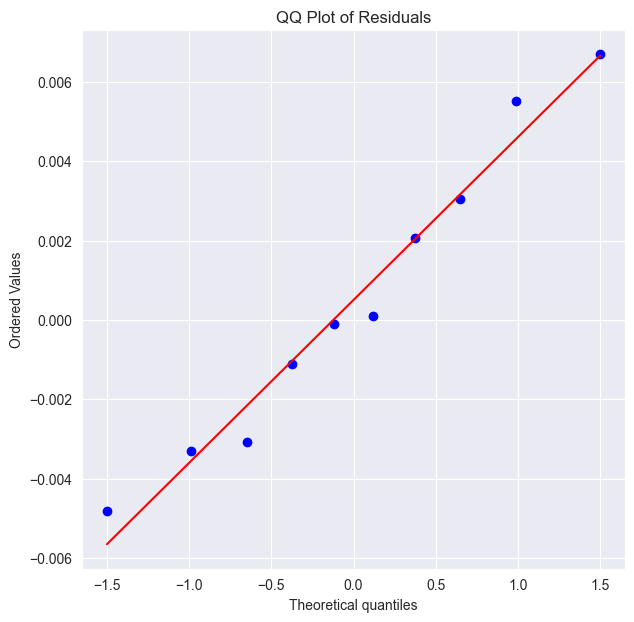

In [183]:
##  - QQ PLOT -
import scipy.stats as stats

# Verifica che le lunghezze di best_y_test e best_y_pred siano uguali
if len(best_y_test) != len(best_y_pred):
    raise ValueError("Le lunghezze di best_y_test e best_y_pred non sono uguali!")

# Calcola i residui
residuals = best_y_test - best_y_pred

# Genera i valori per il QQ plot senza disegnarlo
(theoretical_quantiles, ordered_values), (slope, intercept, r) = stats.probplot(residuals, dist="norm")

# Crea un DataFrame per visualizzare i valori in due colonne
df_qq = pd.DataFrame({
    'Theoretical Quantiles': theoretical_quantiles,
    'Ordered Values (Residuals)': ordered_values
})
# Stampa il DataFrame
print(df_qq)

plt.figure(figsize=(7, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.grid(True)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}qq.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}qq.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

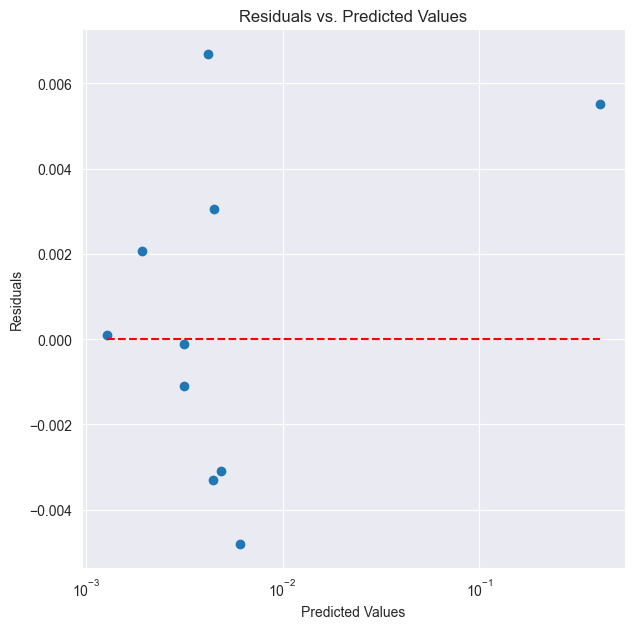

In [184]:
# Residual plot
plt.figure(figsize=(7, 7))
plt.scatter(best_y_pred, residuals)
plt.hlines(0, min(best_y_pred), max(best_y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xscale('log', base=10)
plt.title('Residuals vs. Predicted Values')
plt.grid(True)


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}final_train.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}final_train.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

    Predicted Values (log10)  Residuals
20                 -2.893497   0.000103
41                 -2.314948  -0.003085
34                 -2.353738  -0.003296
42                 -2.346556   0.003053
26                 -2.502290  -0.001108
44                 -2.216262  -0.004805
21                 -2.713514   0.002073
27                 -2.502290  -0.000106
39                 -2.378191   0.006693
11                 -0.384665   0.005520


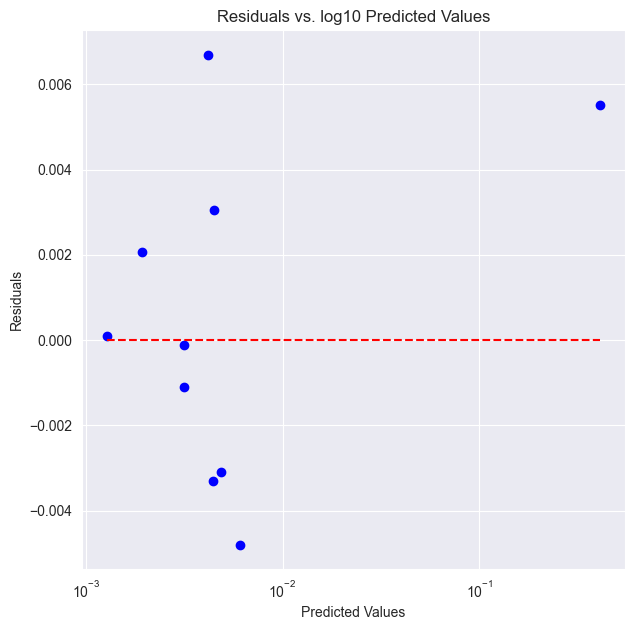

In [185]:
# Calcola i residui
residuals = best_y_test - best_y_pred

# Applica la trasformazione log10 ai valori predetti
log_predicted_values = np.log10(best_y_pred)

# Crea un DataFrame per i valori predetti scalati in log10 e i residui
df_residuals = pd.DataFrame({
    'Predicted Values (log10)': log_predicted_values,
    'Residuals': residuals
})

# Stampa il DataFrame per visualizzare i dati plottati
print(df_residuals)


# Plot dei residui in log10 view
plt.figure(figsize=(7, 7))
plt.scatter(best_y_pred, residuals, color='blue')
plt.hlines(0, min(best_y_pred), max(best_y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xscale('log', base=10)
plt.title('Residuals vs. log10 Predicted Values')
plt.grid(True)
plt.savefig('residuals_log10.pdf', dpi=300)
plt.show()

In [186]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Crea un DataFrame per visualizzare i valori in modo chiaro
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})

# Stampa il DataFrame
print(df_feature_importance)

# Example code to plot feature importance with values annotated on each bar
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.6  # Reduce this value to make the bars narrower

# Plot the bars with the specified width
bars = plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_, width=bar_width)
plt.xticks(range(len(best_model.feature_importances_)), X.columns, rotation=0)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)

# Annotate the bars with the importance values as percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

ValueError: All arrays must be of the same length

Questo è il corretto modello di Bias-Variance Tradeoff

Training Scores:
   Training examples           MSE
0                  4  4.616102e-07
1                  8  2.882179e-07
2                 12  3.526811e-07
3                 17  3.621918e-07
4                 21  3.713115e-07
5                 25  3.505783e-07
6                 30  3.356891e-07
7                 34  3.306604e-07
8                 38  3.514837e-07
9                 43  3.599327e-07

Cross-validation Scores:
   Training examples       MSE
0                  4  0.040324
1                  8  0.039423
2                 12  0.016984
3                 17  0.021491
4                 21  0.019544
5                 25  0.020126
6                 30  0.017084
7                 34  0.017325
8                 38  0.017387
9                 43  0.017177


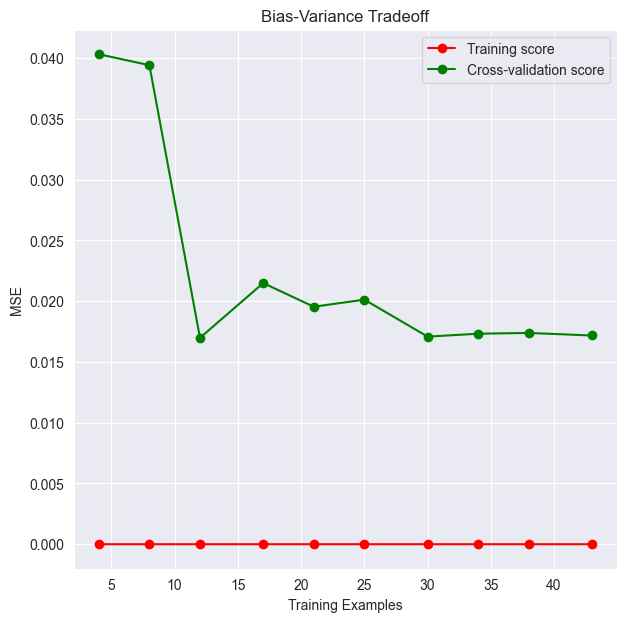

In [29]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Bias-Variance plot with MSE
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=15, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)  # Invert sign for positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)

# Crea due DataFrame separati per visualizzare i punteggi di Training e di Cross-validation
df_train_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': train_scores_mean
})
df_test_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': test_scores_mean
})
# Stampa i DataFrame per visualizzare i dati
print("Training Scores:")
print(df_train_scores)
print("\nCross-validation Scores:")
print(df_test_scores)

plt.figure(figsize=(7, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
# plt.yscale('log', base=10)
plt.title('Bias-Variance Tradeoff')
plt.legend(loc='best')
plt.grid(True)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()


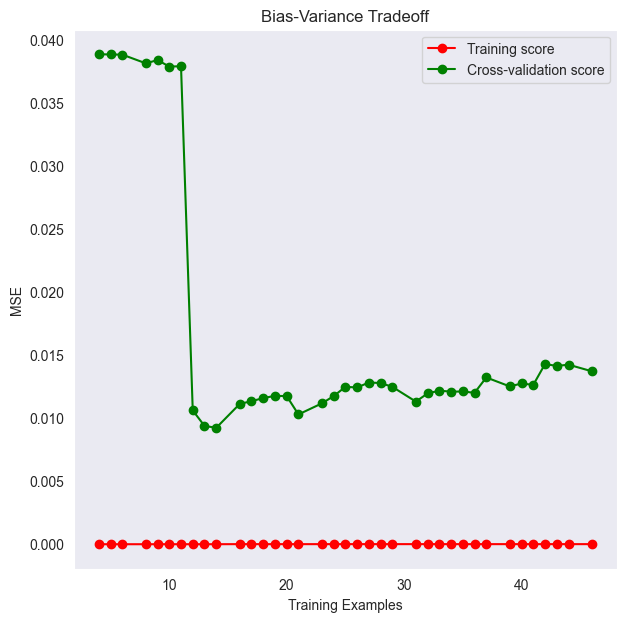

In [58]:
modelBiasVariance = XGBRegressor(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=42)
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, LeaveOneOut

from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
# Calcolare la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    modelBiasVariance, X, y, cv=loo, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, len(y_train))
)

# Calcolare la media dei punteggi di addestramento e validazione
train_scores_mean = -np.mean(train_scores, axis=1)  # Invertire il segno per avere MSE positivo
test_scores_mean = -np.mean(test_scores, axis=1)
# Plottare i risultati
plt.figure(figsize=(7, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Da qui in poi procederemo con l'analisi dei dati aggiuntivi o altre analisi su tutto il dataset

In [ ]:
df_scaled_2 = df_scaled.copy()
df_scaled_2
print(df_scaled_2)

In [ ]:
print(X_train)
print(y_train)

In [ ]:
#voglio rimuovre dal dataset df_scaled_2 i dati con "k_m2" > 0.25
df_scaled_2 = df_scaled_2[df_scaled_2['k_m2'] <= 0.25]
df_scaled_2

In [ ]:
#Con gli iperparametri migliori trovati, riaddestro il modello sul miglior random state per train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

fx_xTrain=None
fx_xTest=None
fx_yTrain=None

df_scaled_2 = df_scaled[df_scaled['k_m2'] <= 0.25]

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor(
        alpha= 0,
        colsample_bytree= 0.7,
        gamma= 0,
        learning_rate= 0.3,
        max_depth= 7,
        reg_lambda = 0.1,
        min_child_weight = 1,
        n_estimators= 100,
        subsample= 0.9
    )
    
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test
        fx_xTrain = X_train
        fx_xTest = X_test
        fx_yTrain = y_train

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred)
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)
plt.show()



In [ ]:
y_pred = best_model.predict(X)
score = r2_score(y, y_pred)

plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
print(score)

In [ ]:
#Visualizzo in Log10

plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred, color='red', alpha=0.8, edgecolors='black') 
plt.scatter(best_y_test, best_y_pred, color='yellow', alpha=0.8, edgecolors='black') 
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'k--', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)
plt.show()

Qui proviamo a prevedere tutta la colonna "k_m2_predicted" ed estrapoliamo il csv

In [149]:

# il modello adesso prevede k_m2 per ogni record
y_pred_tot = best_model.predict(X)

# Aggiungo la colonna delle predizioni al dataset
X['k_m2_predetto'] = y_pred_tot

# Visualizza il dataset con la nuova colonna
print(X)


ValueError: feature_names mismatch: ['Conn.Dens.', 'Porosity', 'SSA', 'Ech', 'Tortuosity'] ['Conn.Dens.', 'Porosity', 'SSA', 'Ech', 'Tortuosity', 'k_m2_predetto']
training data did not have the following fields: k_m2_predetto

In [137]:
#Denormalizzo tutto
df_denormalizzato = scaler.inverse_transform(X)

# Converti di nuovo in DataFrame
df_denormalizzato = pd.DataFrame(df_denormalizzato, columns=X.columns)

# Visualizza il dataset denormalizzato
print(df_denormalizzato)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity  k_m2_predetto
0      310.913     0.137   5.065  -25.849      2.0340   3.241881e-12
1      310.913     0.147   5.253  -31.002      2.6650   2.196749e-12
2      310.913     0.131   4.697  -20.047      2.1090   7.319353e-12
3      350.137     0.115   5.583  -50.613      4.1830   1.025653e-12
4      350.137     0.139   7.447 -136.737      2.5950   4.321349e-13
5      350.137     0.115   5.311  -32.907      4.1010   1.086568e-12
6      368.141     0.134   6.990 -115.218      2.7740   9.374187e-13
7      368.141     0.138   7.132 -110.411      2.7790   2.617055e-12
8      368.141     0.116   5.290  -39.748      3.8680   1.221046e-12
9       10.573     0.020   0.791   -3.948      3.1000   7.564085e-13
10      10.573     0.020   0.806   -2.017      2.9000   7.564085e-13
11     458.436     0.273   7.721 -102.424      1.7170   5.888957e-11
12     458.436     0.250   6.870  -76.478      1.3530   3.659851e-11
13     458.436     0.265   7.560  

In [138]:
df_denormalizzato.to_csv('dataset_con_predizioni.csv', index=False)


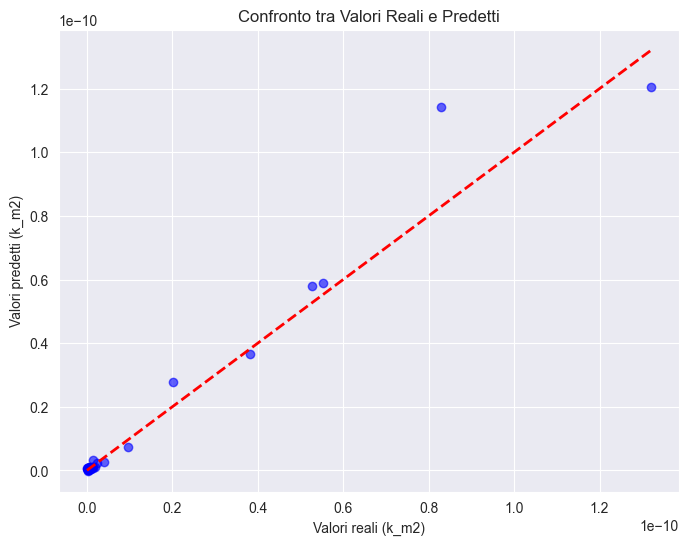

In [139]:
import matplotlib.pyplot as plt

# Supponiamo che il target vero sia y_true e le predizioni del modello siano y_pred
y_true = df['k_m2']
y_pred = df_denormalizzato['k_m2_predetto']

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # Linea diagonale
plt.xlabel('Valori reali (k_m2)')
plt.ylabel('Valori predetti (k_m2)')
plt.title('Confronto tra Valori Reali e Predetti')
plt.show()


Prova sui dati test extra

In [140]:
import pandas as pd

try:
    # Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/extra.xlsx'  # Sostituisci con il percorso del tuo file

    # Leggi i dati dal file XLSX e crea un DataFrame
    df_extra = pd.read_excel(xlsx_file)

    # Controlla quali colonne ci sono nel DataFrame
    print(df_extra.columns)

    # Rimuovi il record con k_m2 uguale a 0
    df = df_extra[df_extra['k_m2'] != 0]

    # Rimuovi colonne Porosity_tot e SSA_tot (assicurati che i nomi siano corretti)
    df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)  # Cambia i nomi se necessario

    # Resetta gli indici del DataFrame
    df.reset_index(drop=True, inplace=True)

    k2_max = df['k_m2'].max()
    k2_min = df['k_m2'].min()
    print(df)

except FileNotFoundError as e:
    print("Il file non è stato trovato.")
except KeyError as e:
    print(f"Si è verificato un errore: {e}. Controlla i nomi delle colonne.")
except Exception as e:
    print(f"Si è verificato un errore: {e}")


Index(['Porosity_Tot', 'SSA_Tot', 'Conn.Dens.', 'Porosity', 'SSA', 'Ech',
       'Tortuosity', 'k_m2'],
      dtype='object')
    Conn.Dens.  Porosity        SSA         Ech  Tortuosity          k_m2
0    28.320000  0.043000   2.511000  -28.011000       3.600  5.500000e-14
1   518.541000  0.237048   6.757200 -127.000000       1.328  3.762810e-11
2   518.541000  0.218960   6.757200 -167.000000       2.408  9.867718e-12
3   518.541000  0.237286   7.320300 -220.000000       2.428  6.567718e-12
4   553.612000  0.294816   6.118200 -127.000000       1.590  3.762810e-11
5   553.612000  0.272320   6.118200 -200.000000       1.900  8.508645e-11
6   553.612000  0.295112   6.628050 -250.000000       1.870  6.782754e-11
7   371.124000  0.234060   5.358000 -127.000000       1.975  1.264402e-11
8   371.124000  0.216200   5.358000 -180.000000       2.473  8.867718e-12
9   371.124000  0.234295   5.804500 -220.000000       1.817  1.508066e-11
10   28.608500  0.138049   1.385846  -34.252938       2.460 

In [141]:

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled_extra = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled_extra)


DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.000000  0.094487  0.107720  0.909617    0.850299  0.000252
1     0.933235  0.791451  0.514242  0.504002    0.000000  0.442014
2     0.933235  0.726484  0.514242  0.340099    0.404192  0.115624
3     0.933235  0.792306  0.568152  0.122927    0.411677  0.076825
4     1.000000  0.998937  0.453065  0.504002    0.098054  0.442014
5     1.000000  0.918138  0.453065  0.204879    0.214072  1.000000
6     1.000000  1.000000  0.501877  0.000000    0.202844  0.797080
7     0.652597  0.780719  0.380285  0.504002    0.242141  0.148266
8     0.652597  0.716571  0.380285  0.286830    0.428518  0.103867
9     0.652597  0.781563  0.423032  0.122927    0.183009  0.176915
10    0.000549  0.435876  0.000000  0.884040    0.423653  0.021713
11    0.007212  0.439640  0.004455  0.862762    0.812874  0.016924
12    0.014662  0.522267  0.026514  0.849576    0.513473  0.020163
13    0.005824  0.652833  0.067178  0.88004

In [143]:
df_toEvaluate = df_scaled_extra.drop('k_m2', axis=1)

#predict 
y_pred_extra = best_model.predict(df_toEvaluate)

# Aggiungo la colonna delle predizioni al dataset
df_toEvaluate['k_m2_predetto'] = y_pred_extra
print(df_toEvaluate)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity  k_m2_predetto
0     0.000000  0.094487  0.107720  0.909617    0.850299       0.005130
1     0.933235  0.791451  0.514242  0.504002    0.000000       0.204510
2     0.933235  0.726484  0.514242  0.340099    0.404192       0.262388
3     0.933235  0.792306  0.568152  0.122927    0.411677       0.262388
4     1.000000  0.998937  0.453065  0.504002    0.098054       0.788201
5     1.000000  0.918138  0.453065  0.204879    0.214072       0.595810
6     1.000000  1.000000  0.501877  0.000000    0.202844       0.876820
7     0.652597  0.780719  0.380285  0.504002    0.242141       0.011783
8     0.652597  0.716571  0.380285  0.286830    0.428518       0.092431
9     0.652597  0.781563  0.423032  0.122927    0.183009       0.096147
10    0.000549  0.435876  0.000000  0.884040    0.423653       0.011728
11    0.007212  0.439640  0.004455  0.862762    0.812874       0.014982
12    0.014662  0.522267  0.026514  0.849576    0.513473       0

In [144]:
#Denormalizzo tutto
scaled_data = scaler.inverse_transform(df_toEvaluate)

# Converti di nuovo in DataFrame
df_extra_denormalizzato = pd.DataFrame(scaled_data, columns=df_toEvaluate.columns)

# Visualizza il dataset denormalizzato
print(df_extra_denormalizzato)

    Conn.Dens.  Porosity        SSA         Ech  Tortuosity  k_m2_predetto
0    28.320000  0.043000   2.511000  -28.011000       3.600   4.698730e-13
1   518.541000  0.237048   6.757200 -127.000000       1.328   1.742768e-11
2   518.541000  0.218960   6.757200 -167.000000       2.408   2.235038e-11
3   518.541000  0.237286   7.320300 -220.000000       2.428   2.235038e-11
4   553.612000  0.294816   6.118200 -127.000000       1.590   6.707233e-11
5   553.612000  0.272320   6.118200 -200.000000       1.900   5.070892e-11
6   553.612000  0.295112   6.628050 -250.000000       1.870   7.460962e-11
7   371.124000  0.234060   5.358000 -127.000000       1.975   1.035718e-12
8   371.124000  0.216200   5.358000 -180.000000       2.473   7.895048e-12
9   371.124000  0.234295   5.804500 -220.000000       1.817   8.211128e-12
10   28.608500  0.138049   1.385846  -34.252938       2.460   1.031017e-12
11   32.108562  0.139097   1.432379  -39.445750       3.500   1.307788e-12
12   36.021875  0.162102 

In [ ]:
df_extra_denormalizzato.to_csv('dataset_con_predizioni_extra.csv', index=False)

Temporary

In [117]:
print(results_df)

    Valori Reali  Valori Predetti
20      0.001381         0.001308
41      0.001757         0.003535
34      0.001132         0.001774
42      0.007556         0.003131
26      0.002038         0.002413
44      0.001272         0.002592
21      0.004007         0.001690
27      0.003040         0.002841
39      0.010879         0.003535
11      0.417936         0.398794


In [119]:
#Denormalizzo tutto
scaled_data = scaler.inverse_transform(results_df)

# Converti di nuovo in DataFrame
df_extra_denormalizzato = pd.DataFrame(scaled_data, columns=results_df.columns)

# Visualizza il dataset denormalizzato
print(df_extra_denormalizzato)

ValueError: operands could not be broadcast together with shapes (10,2) (6,) (10,2) 

In [120]:
print(best_y_test)
print(best_y_pred)

20    0.001381
41    0.001757
34    0.001132
42    0.007556
26    0.002038
44    0.001272
21    0.004007
27    0.003040
39    0.010879
11    0.417936
Name: k_m2, dtype: float64
[0.00130845 0.0035347  0.00177442 0.0031315  0.00241308 0.00259178
 0.00168992 0.00284141 0.0035347  0.39879444]


In [ ]:
df_miller = pd.DataFrame